# libaries used

In [184]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# data collecting

In [185]:
data=pd.read_csv("cars.csv")
data

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


# checking the null values

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [187]:
data.isnull().sum().sum()

0

# visuvalize

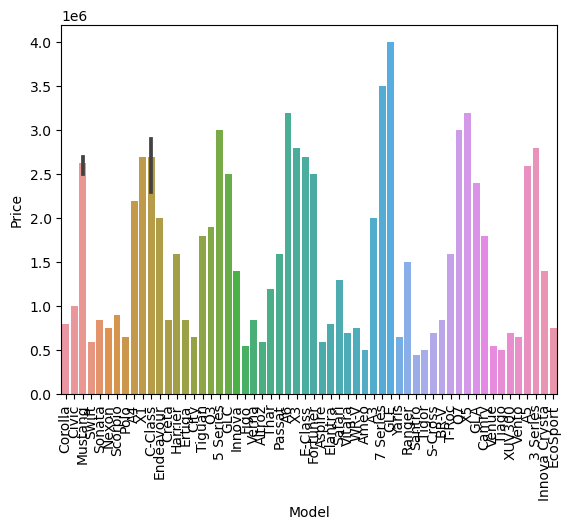

In [188]:
sns.barplot(x="Model",y="Price",data=data)
plt.xticks(rotation=90)
plt.show()

[]

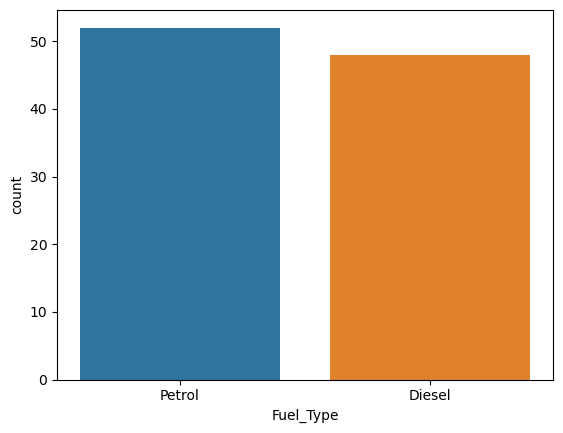

In [189]:
sns.countplot(x=data["Fuel_Type"])
plt.plot()

[]

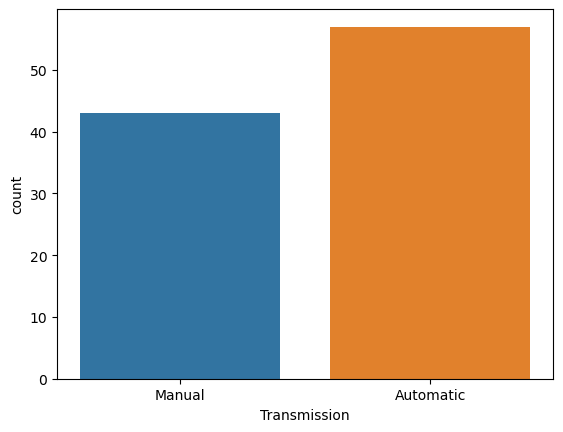

In [190]:
sns.countplot(x=data["Transmission"])
plt.plot()

[]

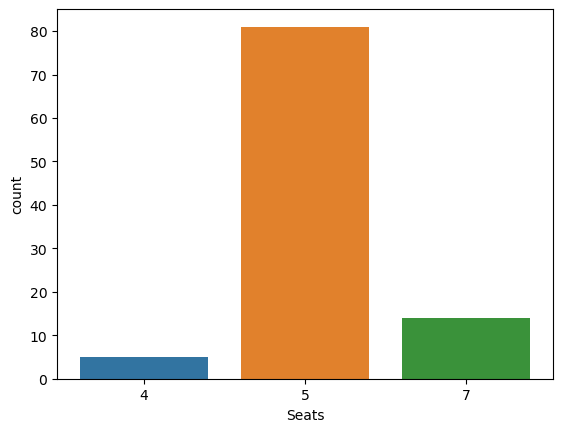

In [191]:
sns.countplot(x=data["Seats"])
plt.plot()

[]

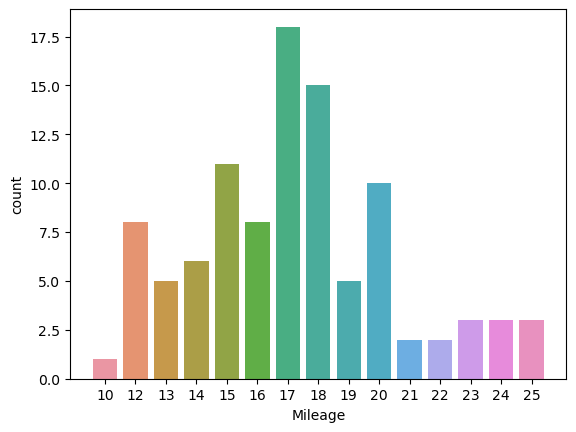

In [192]:
sns.countplot(x=data["Mileage"])
plt.plot()

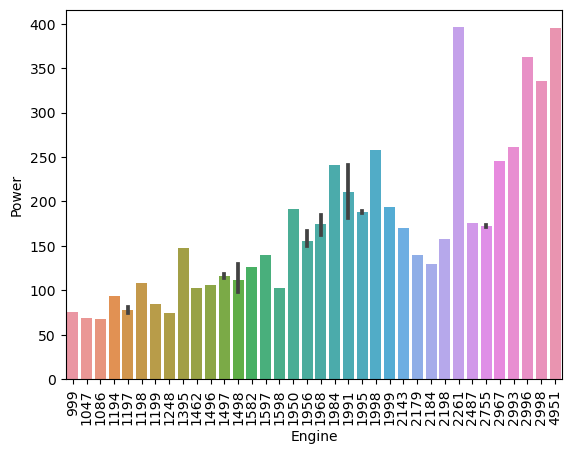

In [193]:
sns.barplot(x="Engine",y="Power",data=data)
plt.xticks(rotation=90)
plt.show()

# data transformation

# linear regression

In [194]:
x=data.iloc[:,:12]
x

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5


In [195]:
LE=LabelEncoder()
x.iloc[:,1]=LE.fit_transform(x.iloc[:,1])
x.iloc[:,2]=LE.fit_transform(x.iloc[:,2])
x.iloc[:,5]=LE.fit_transform(x.iloc[:,5])
x.iloc[:,6]=LE.fit_transform(x.iloc[:,6])
x.iloc[:,7]=LE.fit_transform(x.iloc[:,7])
x

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,1,9,15,2018,50000,1,1,0,15,1498,108,5
1,2,3,14,2019,40000,1,0,1,17,1597,140,5
2,3,2,30,2017,20000,1,0,0,10,4951,395,4
3,4,6,42,2020,30000,0,1,2,23,1248,74,5
4,5,4,41,2016,60000,0,0,1,18,1999,194,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,11,2019,22000,0,0,0,16,1950,191,5
96,97,9,29,2017,38000,0,1,1,13,2755,171,7
97,98,2,18,2018,26000,1,1,2,18,1497,121,5
98,99,4,50,2019,24000,1,0,1,17,1497,113,5


In [196]:
y=data.iloc[:,-1:]
y

,Price
0,800000
1,1000000
2,2500000
3,600000
4,850000
...,...
95,2900000
96,1400000
97,750000
98,850000


In [197]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=40,random_state=70)

In [198]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [199]:
test=LR.predict(x_test)

In [200]:
r1=r2_score(y_test,test)
r1

0.6794742350853811

In [201]:
input_value=[[96,9,29,2017,38000,0,1,1,13,2755,171,7]]
status=LR.predict(input_value)
status

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1705810.20351559]])

# random forest regressor

In [202]:
RF=RandomForestRegressor(n_estimators=7)
RF.fit(x_train,y_train)

/var/folders/xt/0lx8pvls0l3_hdw1ht3z0hz00000gn/T/ipykernel_1067/2671054825.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train,y_train)


RandomForestRegressor(n_estimators=7)

In [203]:
test=RF.predict(x_test)

In [204]:
r2=r2_score(y_test,test)
r2

0.9130274672564589

In [205]:
input_value=[[96,9,29,2017,38000,0,1,1,13,2755,171,7]]
ans=RF.predict(input_value)
ans

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1400000.])

# decision tree regressor

In [206]:
DE=DecisionTreeRegressor()
DE.fit(x_train,y_train)

DecisionTreeRegressor()

In [207]:
test=DE.predict(x_test)

In [208]:
r3=r2_score(y_test,test)
r3

0.622465074936675

In [209]:
input_value=[[96,9,29,2017,38000,0,1,1,13,2755,171,7]]
ans=DE.predict(input_value)
ans

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1400000.])

# supply vector regressor

In [210]:
svm=SVR()
svm.fit(x_train,y_train)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [211]:
test=svm.predict(x_test)

In [212]:
r4=r2_score(y_test,test)
r4

-0.05882471514202736

In [213]:
input_value=[[96,9,29,2017,38000,0,1,1,13,2755,171,7]]
ans=svm.predict(input_value)
ans

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([1400000.23453196])

# creating dictionary

In [214]:
dict={1:r1,2:r2,3:r3,4:r4}
print(dict)

{1: 0.6794742350853811, 2: 0.9130274672564589, 3: 0.622465074936675, 4: -0.05882471514202736}


# dataframe for barplot

,ML MODEL,ACCURACY SCORE
0,LINEAR REGRESSION,0.679474
1,RANDOM FOREST,0.913027
2,DICISION TREE,0.622465
3,SVM,-0.058825


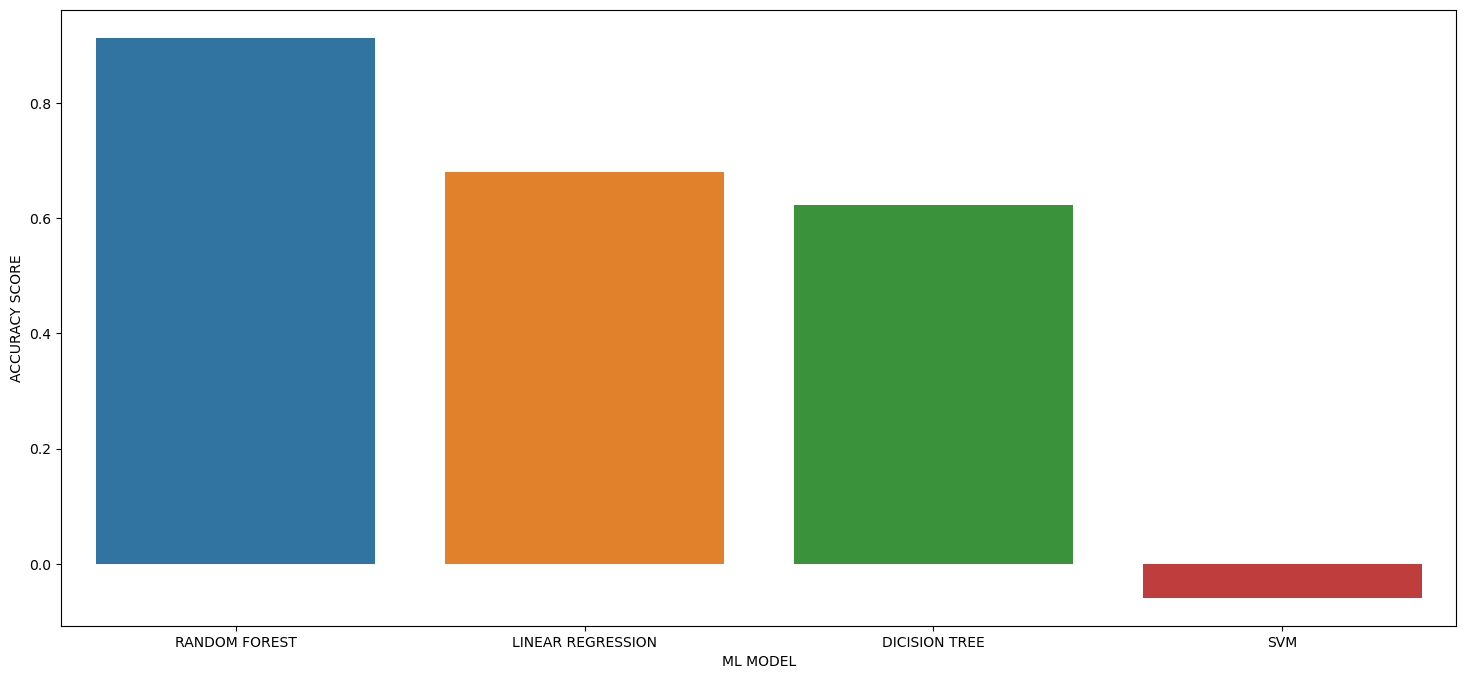

In [215]:
#creating a dataframe
x=pd.DataFrame({
    "ML MODEL":["LINEAR REGRESSION","RANDOM FOREST","DICISION TREE","SVM"],
    "ACCURACY SCORE":[r1,r2,r3,r4]
})
# sorting the value
d=x.sort_values(by="ACCURACY SCORE",ascending=False)
# data for the barplot
plt.figure(figsize=((18,8)))
sns.barplot(x="ML MODEL",y="ACCURACY SCORE",data=d)
x


# conculsion

In [216]:
print("RANDOM FOREST REGRESSOR HAS THE HIGH ACCURACY :",r2)

RANDOM FOREST REGRESSOR HAS THE HIGH ACCURACY : 0.9130274672564589
